In [1]:
from dataloader import AnitaDataset
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch

In [2]:
dataset = AnitaDataset(root_dir="data")

In [3]:
dataloader = DataLoader(dataset, batch_size=5, shuffle=True, num_workers=4)

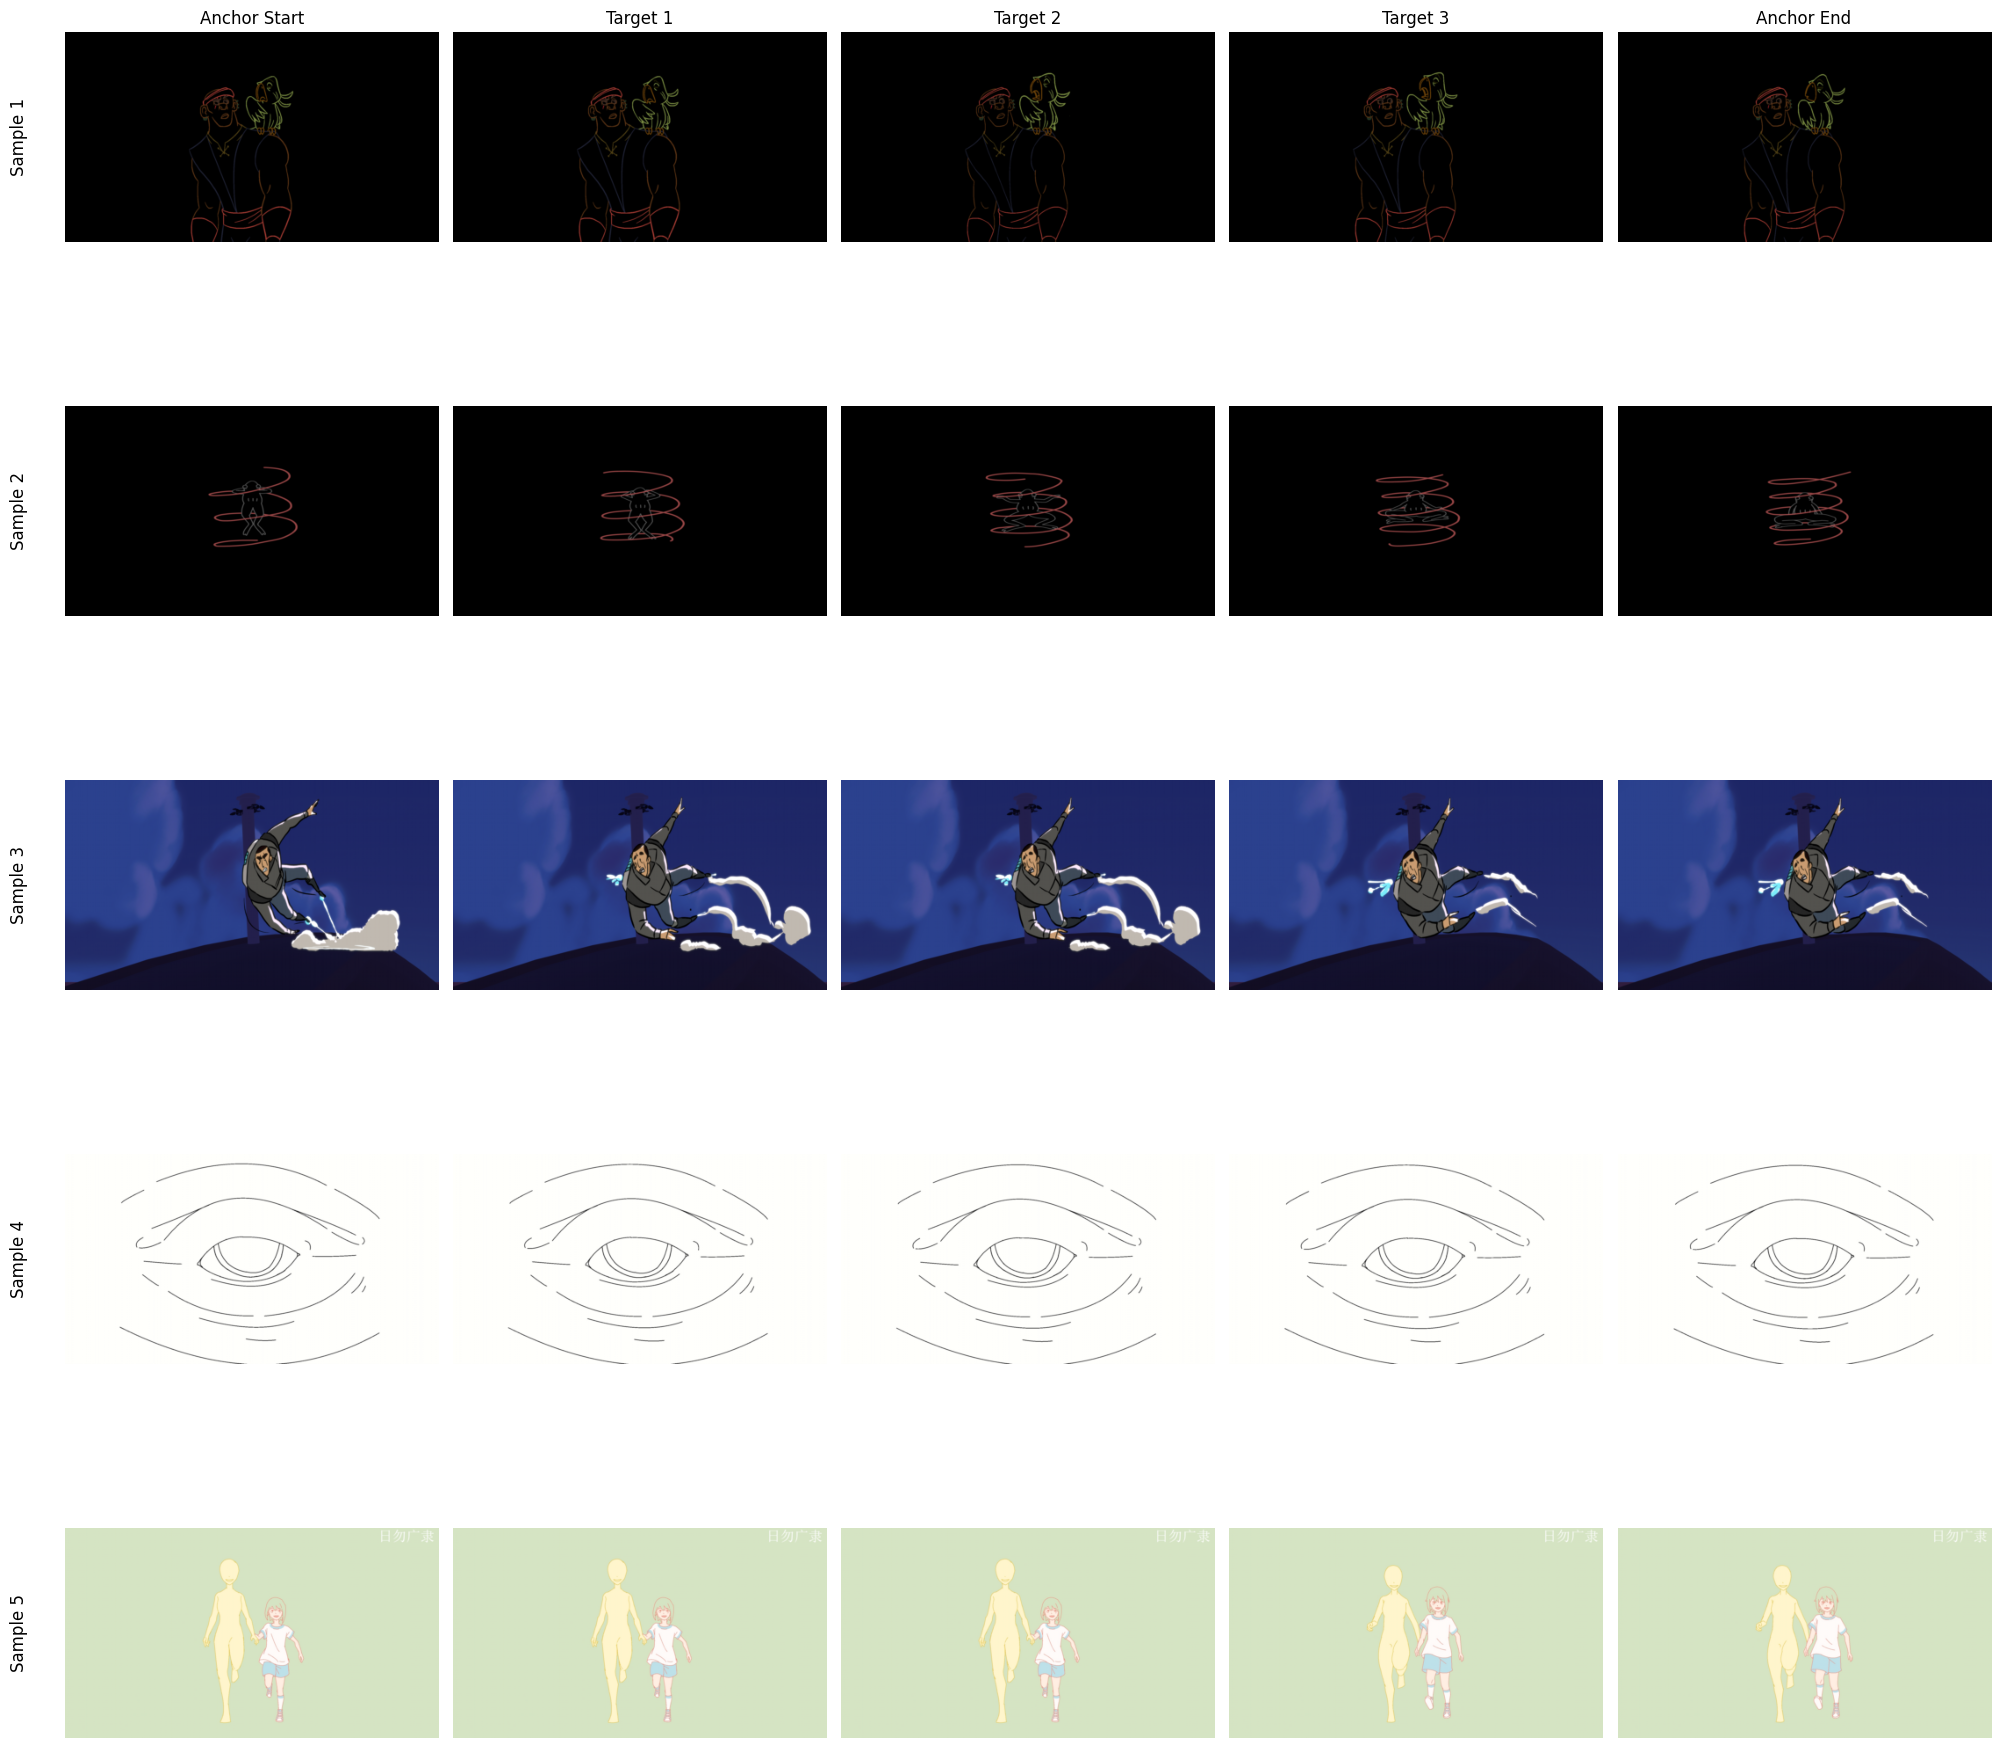

Batch size: 5
Image shape: torch.Size([3, 240, 426])
Number of target frames: 3
Anchor start shape: torch.Size([5, 3, 240, 426])
Anchor end shape: torch.Size([5, 3, 240, 426])
Targets shape: torch.Size([5, 3, 3, 240, 426])


In [ ]:
# Visualize the full batch
batch = next(iter(dataloader))


# Convert tensors to numpy for visualization
# Images are in CHW format, convert to HWC and clamp values to [0, 1]
def tensor_to_image(tensor):
    img = tensor.permute(1, 2, 0).cpu().numpy()
    img = img.clip(0, 1)
    return img


# Get batch dimensions
batch_size = batch["anchor_start"].shape[0]
num_targets = batch["targets"].shape[1]
num_frames = 2 + num_targets  # anchor_start + targets + anchor_end

# Create a figure to display all samples in the batch
# Each row is one sample, showing all its frames
fig, axes = plt.subplots(
    batch_size, num_frames, figsize=(4 * num_frames, 4 * batch_size)
)

# Handle case when batch_size is 1
if batch_size == 1:
    axes = axes.reshape(1, -1)

# Visualize each sample in the batch
for sample_idx in range(batch_size):
    anchor_start = batch["anchor_start"][sample_idx]
    anchor_end = batch["anchor_end"][sample_idx]
    targets = batch["targets"][sample_idx]

    # Display anchor_start
    axes[sample_idx, 0].imshow(tensor_to_image(anchor_start))
    if sample_idx == 0:
        axes[sample_idx, 0].set_title("Anchor Start")
    axes[sample_idx, 0].axis("off")

    # Display target frames
    for i in range(num_targets):
        axes[sample_idx, i + 1].imshow(tensor_to_image(targets[i]))
        if sample_idx == 0:
            axes[sample_idx, i + 1].set_title(f"Target {i + 1}")
        axes[sample_idx, i + 1].axis("off")

    # Display anchor_end
    axes[sample_idx, -1].imshow(tensor_to_image(anchor_end))
    if sample_idx == 0:
        axes[sample_idx, -1].set_title("Anchor End")
    axes[sample_idx, -1].axis("off")

    # Add sample label on the left
    axes[sample_idx, 0].text(
        -0.1,
        0.5,
        f"Sample {sample_idx + 1}",
        transform=axes[sample_idx, 0].transAxes,
        rotation=90,
        va="center",
        ha="right",
        fontsize=12,
    )

plt.tight_layout()
plt.show()

# Print batch information
print(f"Batch size: {batch['anchor_start'].shape[0]}")
print(f"Image shape: {batch['anchor_start'].shape[1:]}")
print(f"Number of target frames: {num_targets}")
print(f"Anchor start shape: {batch['anchor_start'].shape}")
print(f"Anchor end shape: {batch['anchor_end'].shape}")
print(f"Targets shape: {batch['targets'].shape}")